In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading the data set
data = pd.read_csv('Online Payment Fraud Detection.csv',encoding='unicode-escape')

In [3]:
data.shape

(1048575, 10)

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [6]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [7]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [9]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [10]:

data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [11]:
data.nameDest.unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'M1355182933',
       'M1964992463', 'M677577406'], dtype=object)

In [12]:
data.nameOrig.unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C2037964975',
       'C1633237354', 'C1264356443'], dtype=object)

In [14]:
data.nameOrig.value_counts()

C1840223033    2
C1254942913    2
C294362797     2
C688001520     2
C1136988027    2
              ..
C1766320221    1
C1724726141    1
C822883465     1
C261885000     1
C2062822529    1
Name: nameOrig, Length: 1048317, dtype: int64

In [15]:
data.nameDest.value_counts()

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
C2049476999     1
M707021052      1
M709213334      1
M677194513      1
M1675623788     1
Name: nameDest, Length: 449635, dtype: int64

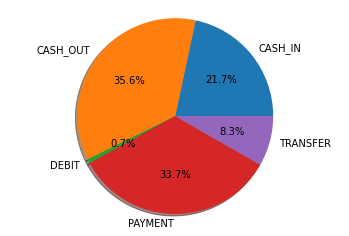

In [16]:
labels = data['type'].astype('category').cat.categories.tolist()
counts = data['type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [17]:
data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [18]:
top_ten = data.groupby('nameOrig').type.sum().sort_values(ascending=False)[:10]
top_ten

nameOrig
C940075559     TRANSFERTRANSFER
C1378765159    TRANSFERTRANSFER
C813633808     TRANSFERTRANSFER
C24957224      TRANSFERTRANSFER
C1077087409     TRANSFERPAYMENT
C495164373      TRANSFERPAYMENT
C1039623203     TRANSFERPAYMENT
C192628069      TRANSFERPAYMENT
C196315367      TRANSFERPAYMENT
C1709295811     TRANSFERPAYMENT
Name: type, dtype: object

In [19]:
data['amount'].mean()

158666.9755271443

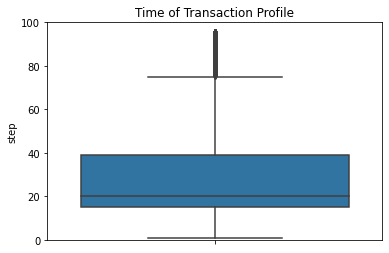

In [20]:
sns.boxplot(y=data.step)
plt.title('Time of Transaction Profile')
plt.ylim(0,100)
plt.show()

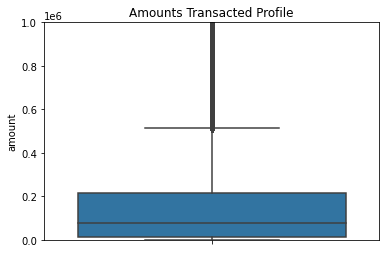

In [21]:
sns.boxplot(y=data.amount)
plt.title('Amounts Transacted Profile')
plt.ylim(0,1000000)
plt.show()

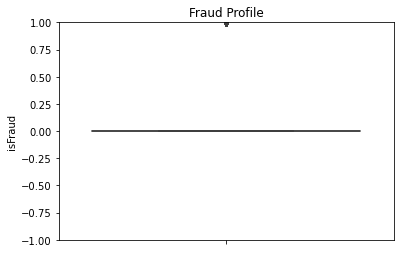

In [22]:
sns.boxplot(y=data.isFraud)
plt.title('Fraud Profile')
plt.ylim(-1,1)
plt.show()

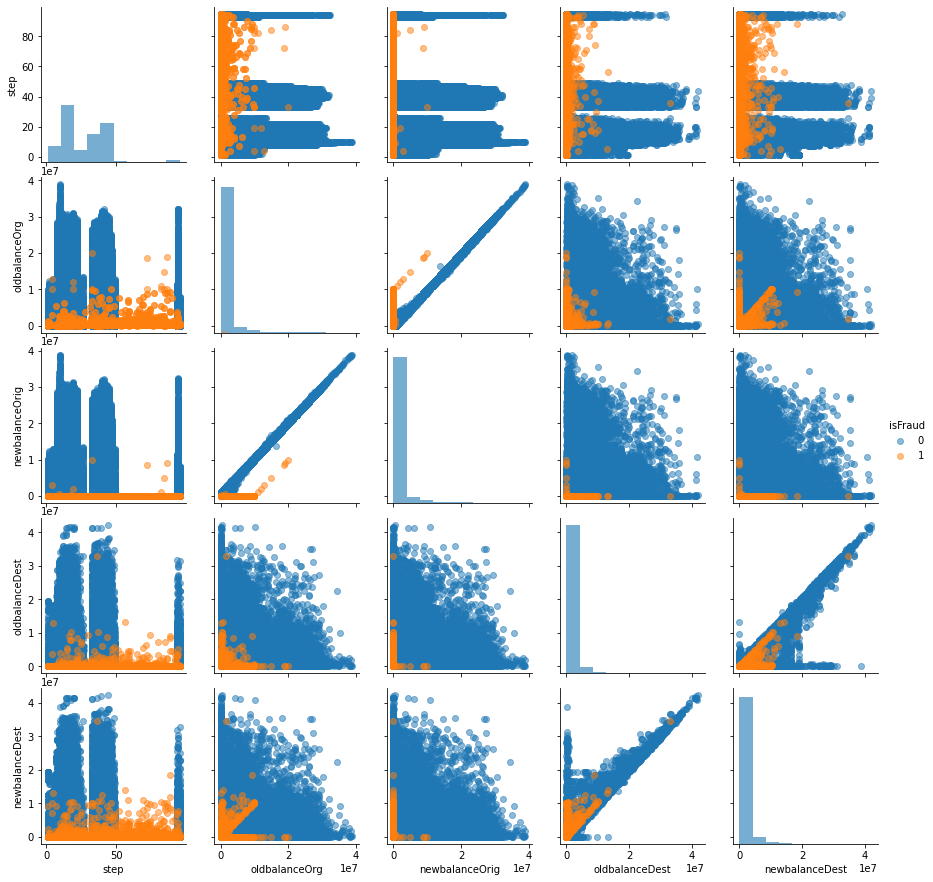

In [23]:

Online_Payment_layout = sns.PairGrid(data, vars = ['step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], hue = 'isFraud')

Online_Payment_layout.map_diag(plt.hist, alpha = 0.6)
Online_Payment_layout.map_offdiag(plt.scatter, alpha = 0.5)
Online_Payment_layout.add_legend()

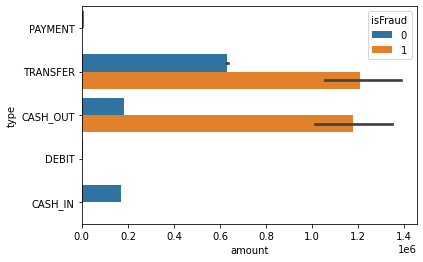

In [24]:
sns.barplot(x='amount', y='type', hue= 'isFraud', data=data)
plt.show()

(0.0, 2000000.0)

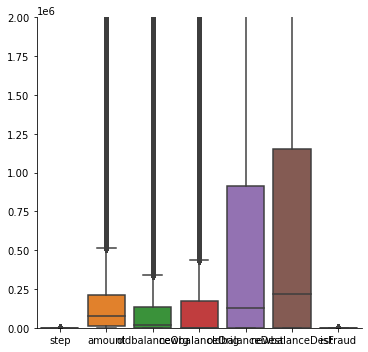

In [25]:
sns.catplot(data=data,kind='box')

plt.ylim(0,2000000)

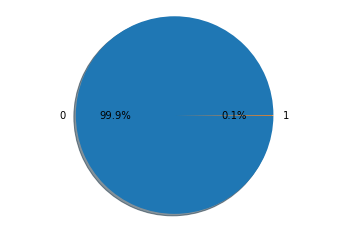

In [26]:
labels = data['isFraud'].astype('category').cat.categories.tolist()
counts = data['isFraud'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [27]:
Fraudulent_Transaction = data[data.isFraud ==1]
Not_Fraudulent_Transaction = data[data.isFraud ==0]

In [28]:
print('Fraudulent Transaction: {}'.format(len(Fraudulent_Transaction)))
print('Not Fraudulent Transaction: {}'.format(len(Not_Fraudulent_Transaction)))
   

Fraudulent Transaction: 1142
Not Fraudulent Transaction: 1047433


In [29]:
Not_Fraudulent_Transaction.amount.describe()

count    1.047433e+06
mean     1.575397e+05
std      2.541883e+05
min      1.000000e-01
25%      1.213487e+04
50%      7.621497e+04
75%      2.134928e+05
max      6.419835e+06
Name: amount, dtype: float64

In [30]:
Fraudulent_Transaction.amount.describe()

count    1.142000e+03
mean     1.192629e+06
std      2.030599e+06
min      1.190000e+02
25%      8.607017e+04
50%      3.531794e+05
75%      1.248759e+06
max      1.000000e+07
Name: amount, dtype: float64

In [31]:
data.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0,26.942944,1.575397e+05,8.736338e+05,894746.395080,978732.769117,1.114237e+06
1,48.272329,1.192629e+06,1.218636e+06,33944.321208,452866.124527,1.077940e+06


In [32]:
Non_Fraudulent_Sample = Not_Fraudulent_Transaction.sample(n=1142)

In [33]:
new_dataset = pd.concat([Non_Fraudulent_Sample, Fraudulent_Transaction], axis=0)

In [34]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
244277,14,PAYMENT,16391.43,C48509793,515351.49,498960.06,M432655451,0.00,0.00,0
158336,12,PAYMENT,4232.80,C1114307176,0.00,0.00,M1964734360,0.00,0.00,0
584751,33,TRANSFER,621673.98,C1999756396,0.00,0.00,C1663824951,2660225.45,3281899.43,0
154763,12,CASH_OUT,122771.37,C840238094,107052.00,0.00,C1830841114,157444.21,280215.59,0
185661,13,CASH_IN,292315.67,C1788397786,121389.43,413705.09,C912627281,436130.17,50448.61,0


In [35]:
new_dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1
1048324,95,CASH_OUT,87999.25,C409531429,87999.25,0.0,C1827219533,0.00,87999.25,1


In [36]:
new_dataset['isFraud'].value_counts()

1    1142
0    1142
Name: isFraud, dtype: int64

In [37]:
new_dataset.shape

(2284, 10)

In [38]:
new_dataset.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
isFraud,,,,,,
0,26.938704,1.625890e+05,1.037847e+06,1.063490e+06,1.002800e+06,1.133873e+06
1,48.272329,1.192629e+06,1.218636e+06,3.394432e+04,4.528661e+05,1.077940e+06


In [39]:

from sklearn.preprocessing import OneHotEncoder

In [40]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop=None,)

In [41]:
encoder_df =  pd.get_dummies(new_dataset, columns=['type','nameOrig','nameDest'], prefix=['type','nameOrig','nameDest'])

In [42]:
encoder_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M954394443,nameDest_M956567673,nameDest_M958575270,nameDest_M960036783,nameDest_M961567252,nameDest_M9698116,nameDest_M970528111,nameDest_M980391483,nameDest_M993315495,nameDest_M995421129
244277,14,16391.43,515351.49,498960.06,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158336,12,4232.80,0.00,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
584751,33,621673.98,0.00,0.00,2660225.45,3281899.43,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154763,12,122771.37,107052.00,0.00,157444.21,280215.59,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
185661,13,292315.67,121389.43,413705.09,436130.17,50448.61,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047888,95,56745.14,56745.14,0.00,51433.88,108179.02,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048221,95,33676.59,33676.59,0.00,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048222,95,33676.59,33676.59,0.00,0.00,33676.59,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048323,95,87999.25,87999.25,0.00,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
encoder_df.shape

(2284, 4556)

In [44]:
encoder_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M954394443,nameDest_M956567673,nameDest_M958575270,nameDest_M960036783,nameDest_M961567252,nameDest_M9698116,nameDest_M970528111,nameDest_M980391483,nameDest_M993315495,nameDest_M995421129
244277,14,16391.43,515351.49,498960.06,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158336,12,4232.80,0.00,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
584751,33,621673.98,0.00,0.00,2660225.45,3281899.43,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154763,12,122771.37,107052.00,0.00,157444.21,280215.59,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
185661,13,292315.67,121389.43,413705.09,436130.17,50448.61,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
encoder_df.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M954394443,nameDest_M956567673,nameDest_M958575270,nameDest_M960036783,nameDest_M961567252,nameDest_M9698116,nameDest_M970528111,nameDest_M980391483,nameDest_M993315495,nameDest_M995421129
1047888,95,56745.14,56745.14,0.0,51433.88,108179.02,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048221,95,33676.59,33676.59,0.0,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048222,95,33676.59,33676.59,0.0,0.00,33676.59,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048323,95,87999.25,87999.25,0.0,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048324,95,87999.25,87999.25,0.0,0.00,87999.25,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
Y = encoder_df['isFraud']

In [47]:
features = encoder_df.drop('isFraud', axis=1)

In [48]:
X = features

In [49]:
Y.head()

244277    0
158336    0
584751    0
154763    0
185661    0
Name: isFraud, dtype: int64

In [50]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,...,nameDest_M954394443,nameDest_M956567673,nameDest_M958575270,nameDest_M960036783,nameDest_M961567252,nameDest_M9698116,nameDest_M970528111,nameDest_M980391483,nameDest_M993315495,nameDest_M995421129
244277,14,16391.43,515351.49,498960.06,0.00,0.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
158336,12,4232.80,0.00,0.00,0.00,0.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
584751,33,621673.98,0.00,0.00,2660225.45,3281899.43,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154763,12,122771.37,107052.00,0.00,157444.21,280215.59,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
185661,13,292315.67,121389.43,413705.09,436130.17,50448.61,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [53]:
print('\n',X_train.head(2))

print('\n',X_test.head(2))

print('\n',Y_train.head(2))

print('\n',Y_test.head(2))


          step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1030484    67  106460.70       106460.7             0.0      1414263.15   
449360     19   11446.34          558.0             0.0            0.00   

         newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
1030484      1520723.84             0              1           0   
449360             0.00             0              0           0   

         type_PAYMENT  ...  nameDest_M954394443  nameDest_M956567673  \
1030484             0  ...                    0                    0   
449360              1  ...                    0                    0   

         nameDest_M958575270  nameDest_M960036783  nameDest_M961567252  \
1030484                    0                    0                    0   
449360                     0                    0                    0   

         nameDest_M9698116  nameDest_M970528111  nameDest_M980391483  \
1030484                  0                    0        

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
model = LogisticRegression()

In [56]:
model.fit(X_train, Y_train)

LogisticRegression()

In [57]:
model_pred = model.predict(X_test)

In [58]:
probs = model.predict_proba(X_test)

In [59]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score

In [60]:
print('\nClassification Report:')
print(classification_report(Y_test, model_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       229
           1       0.94      0.95      0.94       228

    accuracy                           0.94       457
   macro avg       0.94      0.94      0.94       457
weighted avg       0.94      0.94      0.94       457



In [61]:
pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'], 
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),214,15
Actually Positive(1),12,216


In [62]:
pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'], 
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),214,15
Actually Fraud(1),12,216


In [63]:
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9409190371991247


In [64]:
average_precision = average_precision_score(Y_test, model_pred)
average_precision

0.9121091968034268

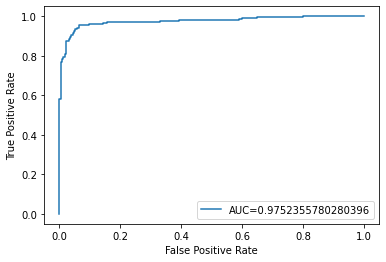

In [65]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [66]:
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:,1]))

AUC Score:
0.9752355780280396


In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model = RandomForestClassifier(random_state=5, n_estimators=20)

In [69]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [70]:
model_pred = model.predict(X_test)

In [71]:
probs = model.predict_proba(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score

In [73]:
print('Classification_Report:\n',classification_report(Y_test, model_pred))

Classification_Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       229
           1       0.97      0.95      0.96       228

    accuracy                           0.96       457
   macro avg       0.96      0.96      0.96       457
weighted avg       0.96      0.96      0.96       457



In [74]:
pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'], 
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),223,6
Actually Positive(1),12,216


In [75]:
pd.DataFrame(confusion_matrix(Y_test, model_pred), 
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'], 
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),223,6
Actually Fraud(1),12,216


In [76]:
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9606126914660832


In [77]:
average_precision = average_precision_score(Y_test, model_pred)
average_precision

0.9480220748215681

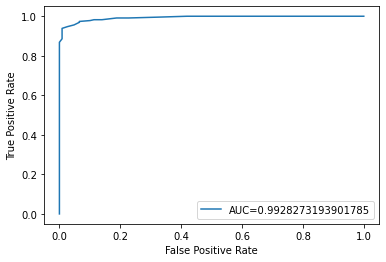

In [78]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [79]:
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:, 1]))

AUC Score:
0.9928273193901785


In [80]:
# Compute correlation matrix
correlation_matrix = data.corr()


In [81]:
print(correlation_matrix)


                    step    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000 -0.025996      -0.006780       -0.007180   
amount         -0.025996  1.000000       0.004864       -0.001133   
oldbalanceOrg  -0.006780  0.004864       1.000000        0.999047   
newbalanceOrig -0.007180 -0.001133       0.999047        1.000000   
oldbalanceDest -0.002251  0.215558       0.093305        0.095182   
newbalanceDest -0.019503  0.311936       0.064049        0.063725   
isFraud         0.045030  0.128862       0.003829       -0.009438   

                oldbalanceDest  newbalanceDest   isFraud  
step                 -0.002251       -0.019503  0.045030  
amount                0.215558        0.311936  0.128862  
oldbalanceOrg         0.093305        0.064049  0.003829  
newbalanceOrig        0.095182        0.063725 -0.009438  
oldbalanceDest        1.000000        0.978403 -0.007552  
newbalanceDest        0.978403        1.000000 -0.000495  
isFraud              -0.007552    

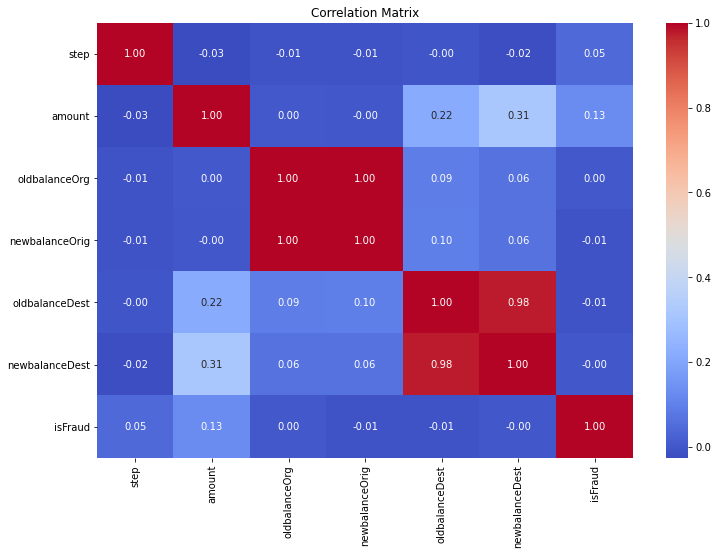

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, Y_train)

# Predictions using KNN
knn_pred = knn_model.predict(X_test)

# Evaluate KNN
print("Classification Report for KNN:")
print(classification_report(Y_test, knn_pred))

# Confusion Matrix for KNN
knn_cm = pd.DataFrame(confusion_matrix(Y_test, knn_pred),
                      columns=['Predicted Negative(0)', 'Predicted Positive(1)'],
                      index=['Actually Negative(0)', 'Actually Positive(1)'])
print("Confusion Matrix for KNN:")
print(knn_cm)

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       229
           1       0.94      0.91      0.92       228

    accuracy                           0.92       457
   macro avg       0.92      0.92      0.92       457
weighted avg       0.92      0.92      0.92       457

Confusion Matrix for KNN:
                      Predicted Negative(0)  Predicted Positive(1)
Actually Negative(0)                    215                     14
Actually Positive(1)                     21                    207


In [84]:
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, Y_train)

# Predictions using KNN
knn_pred = knn_model.predict(X_test)

# Calculate and display accuracy
knn_accuracy = accuracy_score(Y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

KNN Accuracy: 0.92


In [92]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Calculate confusion matrix
knn_cm = confusion_matrix(Y_test, knn_pred)

# Convert confusion matrix to a DataFrame for better readability
knn_cm_df = pd.DataFrame(
    knn_cm,
    columns=['Predicted Negative(0)', 'Predicted Positive(1)'],
    index=['Actually Negative(0)', 'Actually Positive(1)']
)

# Display the confusion matrix
print("Confusion Matrix for KNN:")
print(knn_cm_df)


Confusion Matrix for KNN:
                      Predicted Negative(0)  Predicted Positive(1)
Actually Negative(0)                    215                     14
Actually Positive(1)                     21                    207


In [93]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Calculate confusion matrix
knn_cm = confusion_matrix(Y_test, knn_pred)

# Convert confusion matrix to a DataFrame for better readability
knn_cm_df = pd.DataFrame(
    knn_cm,
    columns=['Predicted Not Fraud(0)', 'Predicted Fraud(1)'],
    index=['Actually Not Fraud(0)', 'Actually Fraud(1)']
)

# Display the confusion matrix for fraud and not fraud
print("Confusion Matrix for KNN (Fraud vs Not Fraud):")
print(knn_cm_df)


Confusion Matrix for KNN (Fraud vs Not Fraud):
                       Predicted Not Fraud(0)  Predicted Fraud(1)
Actually Not Fraud(0)                     215                  14
Actually Fraud(1)                          21                 207


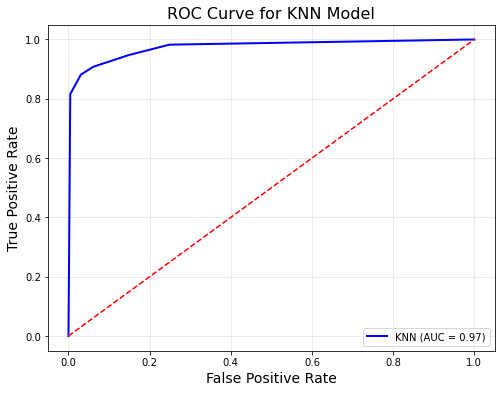

In [87]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute probabilities for positive class
knn_probs = knn_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, knn_probs)

# Compute the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for KNN Model', fontsize=16)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


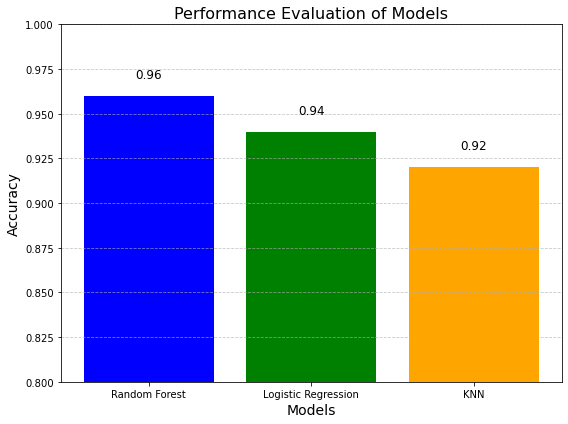

In [94]:
import matplotlib.pyplot as plt

# Define the models and their accuracies
models = ['Random Forest', 'Logistic Regression', 'KNN']
accuracies = [0.96, 0.94, 0.92]  # Replace with your actual accuracy values

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

# Adding labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Performance Evaluation of Models', fontsize=16)
plt.ylim(0.8, 1.0)  # Set y-axis range to focus on high accuracies
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


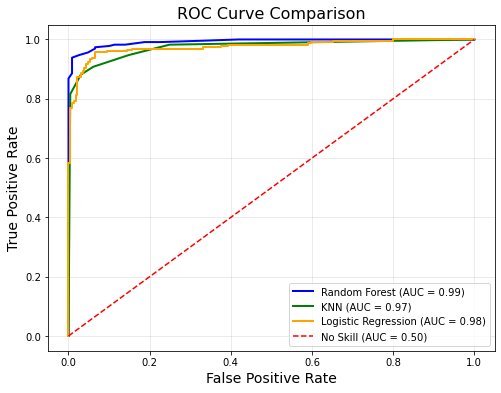

In [91]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute probabilities for Random Forest
rf_probs = model.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Compute probabilities for KNN
knn_probs = knn_model.predict_proba(X_test)[:, 1]
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)
knn_auc = auc(knn_fpr, knn_tpr)

# Train and compute probabilities for Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, Y_train)
lr_probs = lr_model.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

# Plot all ROC curves in one graph
plt.figure(figsize=(8, 6))

# Random Forest ROC curve
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'Random Forest (AUC = {rf_auc:.2f})')

# KNN ROC curve
plt.plot(knn_fpr, knn_tpr, color='green', lw=2, label=f'KNN (AUC = {knn_auc:.2f})')

# Logistic Regression ROC curve
plt.plot(lr_fpr, lr_tpr, color='orange', lw=2, label=f'Logistic Regression (AUC = {lr_auc:.2f})')

# Plot diagonal line (no skill classifier)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='No Skill (AUC = 0.50)')

# Labels and legend
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve Comparison', fontsize=16)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

# Display the plot
plt.show()
